#TP1 M1 info -- Introduction au traitement du signal, aux signaux sonores et aux images

**But du TP** :
* comprendre la structure d'un fichier son et d'une image
* comprendre comment afficher un fichier son ou image
* être capable de comprendre le changement de quantification et d'échantillonnage d'un fichier et être capable de générer ces changements sur un fichier.

**Avertissement** :
Il peut être tentant d'utiliser ChatGPT ou d'autres outils d'écriture de code. Mais il ne s'agit que d'une introduction, couvrant des concepts très simples pour manipuler des fichiers. Nous vous recommandons fortement de ne pas l'utiliser. Vous aurez suffisamment de temps pour réaliser par vous-même les quelques fonctions qui vous sont demandées. Et vous les assimilerez bien mieux. Vous devrez réutiliser ces fonctions pour l'évaluation, ce qui vous confrontera à de nouvelles données. Essayez donc de rendre ces fonctions aussi générales que possible.

In [1]:
# OS setup
#!cat /etc/os-release
# !apt-get install -q=2 tree

# Data loading
!git clone https://gitlab.com/jeromefarinas/tp-m1-ts.git

Cloning into 'tp-m1-ts'...
remote: Enumerating objects: 63, done.
remote: Counting objects: 100% (5/5), done.
remote: Compressing objects: 100% (5/5), done.
remote: Total 63 (delta 0), reused 0 (delta 0), pack-reused 58
Receiving objects: 100% (63/63), 2.62 MiB | 13.81 MiB/s, done.
Resolving deltas: 100% (14/14), done.


In [2]:
# Some usefull library
import matplotlib.pyplot as plt
import scipy.signal
import numpy as np
from IPython.display import Audio

In [ ]:
!tree tp-m1-ts/tp1/

tp-m1-ts/tp1/
├── diner.wav
├── photo.jpg
└── resultat_attendu
    ├── diner_16khz_12bits.wav
    ├── diner_16khz_2bits.wav
    ├── diner_16khz_4bits.wav
    ├── diner_16khz_8bits.wav
    ├── diner_2khz_16bits.wav
    ├── diner_4khz_16bits.wav
    └── diner_8khz_16bits.wav

1 directory, 9 files


##Manipulation de fichiers numériques

###Signal audio

Vous pouvez essayer de charger le fichier audio avec [wav.read](https://docs.scipy.org/doc/scipy/reference/generated/scipy.io.wavfile.read.html) à partir de la bibliothèque [scipy.io.wavfile](https://docs.scipy.org/doc/scipy/reference/io.html#module-scipy.io.wavfile) :

In [3]:
import scipy.io.wavfile as wav
fs, signal = wav.read('tp-m1-ts/tp1/diner.wav')

Ecouter le signal :

In [4]:
Audio(data=signal, rate=fs)

* Affichez les valeurs suivantes : la fréquence d'échantillonnage, la quantification de ce fichier, le nombre d'échantillons

In [9]:
# à vous...
print(f'Fréquence d\'échantillonnage : {fs} Hz')
print(f'Quantification: {signal.dtype}')
print(f'Nombre d\'échantillons: {len(signal)}')

Fréquence d'échantillonnage : 16000 Hz
Quantification: int16
Nombre d'échantillons: 175125


* Afficher graphiquement le signal, avec l'axe des x en secondes

In [15]:
tick_values = np.arange(0, len(signal), fs)

In [16]:
tick_values

array([     0,  16000,  32000,  48000,  64000,  80000,  96000, 112000,
       128000, 144000, 160000])

In [20]:
tick_labels = list(range(11))

In [21]:
tick_labels

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

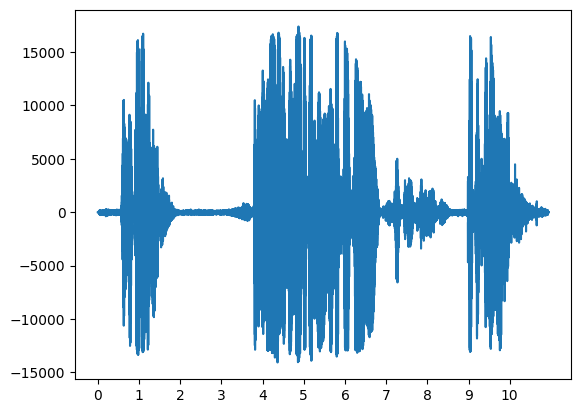

In [22]:
# à vous...
plt.xticks(ticks=tick_values, labels=tick_labels)
plt.plot(signal)

* Transformer des données du signal (qui est en entiers de $-2^{15}+1$ à $2^{15}$) en réels entre -1 et 1. C'est juste une nouvelle version des données, qui vous permettra de moins déborder au niveau des calculs lors de vos manipulations.

In [23]:
# à vous...
normed_signal = signal / np.max(np.abs(signal))

In [25]:
np.min(normed_signal), np.max(normed_signal)

(-0.8088260644716428, 1.0)

* Affichez a nouveau graphiquement ce signal en réels avec l'axe des abscisses en secondes. Ca ne devrait pas différer au niveau de la forme du signal en dehors de la plage de valeurs en ordonnée.


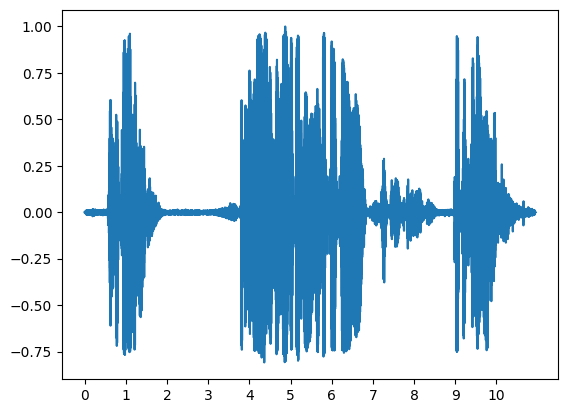

In [26]:
# à vous...
plt.xticks(ticks=tick_values, labels=tick_labels)
plt.plot(normed_signal)

* Affichez les valeurs des 50 premières valeurs à partir de l'index 2000. Affichez aussi graphiquement ces valeurs, avec les points représentés par des "*" rouges, et les traits entre les points en bleu.


In [28]:
# à vous...
print(f'50 premiers après 2000: {normed_signal[2000:2050]}')
fifty = normed_signal[2000:2050]

50 premiers après 2000: [ 1.14922714e-04 -4.02229501e-04 -1.37907257e-03 -7.46997644e-04
 -1.72384072e-04 -1.20668850e-03 -2.70068379e-03 -3.50514279e-03
 -2.64322243e-03  8.04459001e-04  3.84991093e-03  2.52829972e-03
 -1.95368615e-03 -5.05659944e-03 -5.40136758e-03 -3.90737229e-03
 -1.32161122e-03 -2.87306786e-04 -3.62006551e-03 -8.27443544e-03
 -8.10205137e-03 -3.84991093e-03 -1.95368615e-03 -2.98799058e-03
 -2.87306786e-03 -8.61920359e-04 -6.89536287e-04 -2.64322243e-03
 -3.73498822e-03 -3.50514279e-03 -4.19467908e-03 -4.94167672e-03
 -3.84991093e-03 -2.12607022e-03 -1.09176579e-03 -1.72384072e-04
  3.44768143e-04 -1.66637936e-03 -4.30960179e-03 -3.62006551e-03
 -8.61920359e-04  5.74613572e-05 -2.87306786e-04  6.89536287e-04
  1.89622479e-03  1.60891800e-03  1.60891800e-03  2.52829972e-03
  2.52829972e-03  1.66637936e-03]


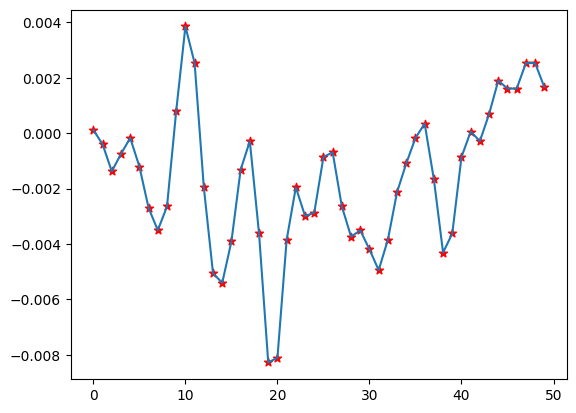

In [33]:
plt.scatter(range(50), fifty, c='r', marker='*')
plt.plot(fifty)

Vous allez écouter le fichier en version ralentie et accélérée.



In [ ]:
Audio(data=signal, rate=fs/2)


In [ ]:
Audio(data=signal, rate=fs*2)

Qu'advient-il des fréquences ? Cette transformation est-elle normale ? Ainsi, si l'on veut jouer plus rapidement un fichier son, quel type de transformation sera nécessaire pour avoir des fréquences normales ? Est-ce que c'est ce que fait youtube avec le changement de débit à la lecture des vidéos ?

vos réponses...

Les fréquences controle la vitesse de lecture des fichiers audio. Mais avec ces transformations, les tonalités des sons changent drastiquement. Pour améliorer ce changement de tonalité, il faut implementer une phase vocoder selon Flanagan, Golden, et Portnoff. YouTube suit une méthode similaire pour fixer la tonalité des vidéos avec les changements de durée. 

### Image

In [34]:
img = plt.imread('tp-m1-ts/tp1/photo.jpg')

* Indiquer les caractéristiques de l'image : taille, type d'éléments


In [35]:
# à vous...
print(f'Taille dImage: {img.shape}')
print(f'Type de données: {img.dtype}')

Taille dImage: (595, 900, 3)
Type de données: uint8


* Affichez graphiquement cette image


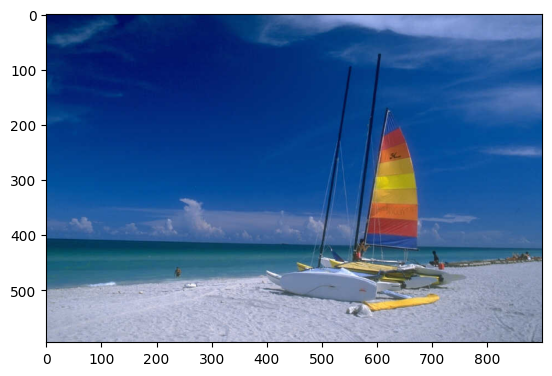

In [36]:
# à vous...
plt.imshow(img)

* Afficher les intensités RVB du premier pixel de l'image

In [38]:
# à vous...
img[0,0,:]

array([ 2, 16, 91], dtype=uint8)

In [55]:
signal.dtype

dtype('int16')

##Quantification, échantillonnage

* Écrire une fonction pour sous-quantifier un fichier audio. Testez-la avec une quantification de 12 bits, 8 bits, 4 bits et 2 bits. Affichez à chaque fois un graphique avec chaque transformation. Que pensez-vous de la qualité sonore obtenue ?

In [65]:
def quantize_signal(signal, n_bits):
    max_int16 = 32768.0
    normalized_signal = signal / max_int16
    
    max_val = 2**(n_bits - 1) - 1
    scaled_signal = normalized_signal * max_val
    
    quantized_signal = np.round(scaled_signal).astype(int)
    
    return quantized_signal
int12_signal = quantize_signal(signal, 12)
int8_signal = quantize_signal(signal, 8)
int4_signal = quantize_signal(signal, 4)
int2_signal = quantize_signal(signal, 2)

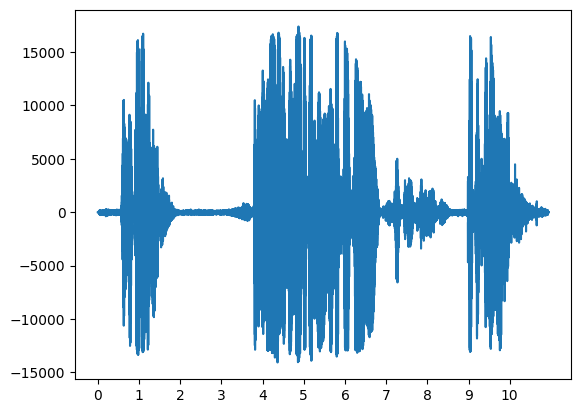

In [66]:
plt.xticks(ticks=tick_values, labels=tick_labels)
plt.plot(signal)

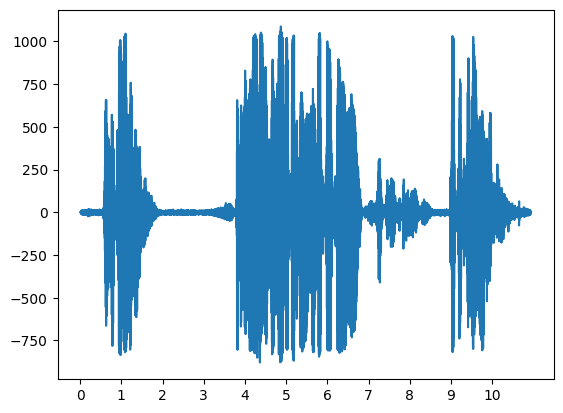

In [67]:
plt.xticks(ticks=tick_values, labels=tick_labels)
plt.plot(int12_signal)

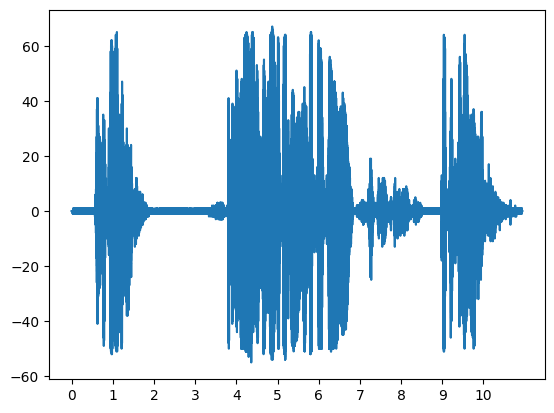

In [68]:
plt.xticks(ticks=tick_values, labels=tick_labels)
plt.plot(int8_signal)

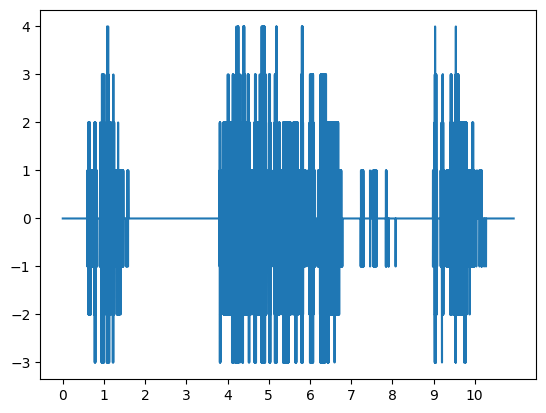

In [69]:
plt.xticks(ticks=tick_values, labels=tick_labels)
plt.plot(int4_signal)

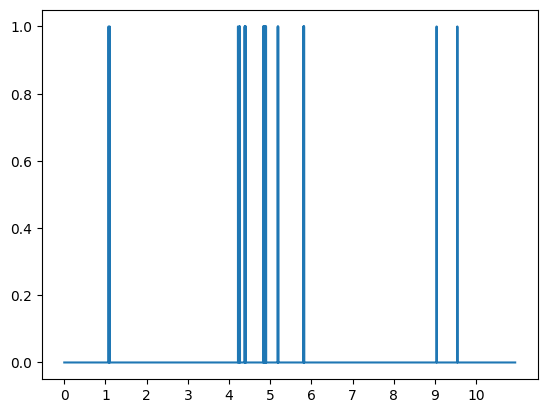

In [70]:
plt.xticks(ticks=tick_values, labels=tick_labels)
plt.plot(int2_signal)


* Écrire une fonction pour sauvegarder une variable audio dans un fichier. Vous pouvez utiliser [wav.write](https://docs.scipy.org/doc/scipy/reference/generated/scipy.io.wavfile.write.html). Vérifiez que l'échantillonnage et la quantification sont corrects dans les fichiers résultants.


In [72]:
# à vous...
def save_audio(filename, fs, signal):
    wav.write(filename, fs, signal)
save_audio('int12_signal.wav', fs, int12_signal)

* Écrire une fonction pour sous-échantillonner un fichier audio (encodé en nombres entiers ou flottants). Testez-la avec un sous-échantillonnage x2, x4 et x8. Que remarquez-vous ?

In [79]:
# à vous...
def resample(signal, ratio):
    new_signal = scipy.signal.resample(signal, int(len(signal) * ratio))
    return new_signal

In [80]:
len(resample(signal, 0.5))

array([  4.48921796,  -6.0846841 ,   6.49092784, ..., -10.99380791,
         5.76991357, -10.24556477])

In [81]:
Audio(data=resample(signal, 0.5), rate=fs/2)

In [82]:
Audio(data=resample(signal, 0.25), rate=fs/4)

Le signal devient de moins en moins legible. 

* Ecrivez une fonction pour sous-quantifier une image en conservant les n bits les plus significatifs (les autres sont mis à 0). Testez-la avec 2 bits et 3 bits. Que remarquez-vous ?
Note : Vous pouvez utiliser [numpy.bitwise_and](https://numpy.org/doc/stable/reference/generated/numpy.bitwise_and.html) pour accéder à la valeur d'un bit.

In [85]:
# à vous...
def sub_quantize(image, n_bits):
    # Calculate the mask to retain the n most significant bits in each byte
    mask = 255 - (2**(8-n_bits) - 1)
    # Apply the mask using bitwise_and to zero out the less significant bits
    quantized_image = np.bitwise_and(image, mask)
    return quantized_image

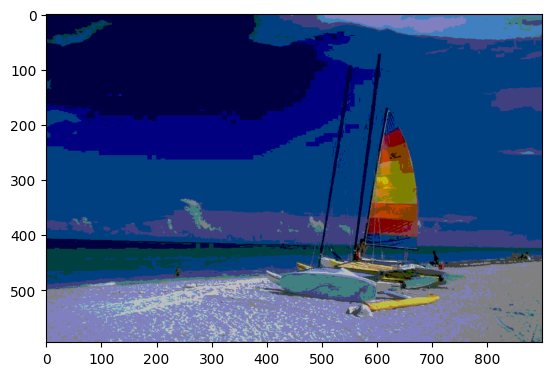

In [86]:
plt.imshow(sub_quantize(img, 2))

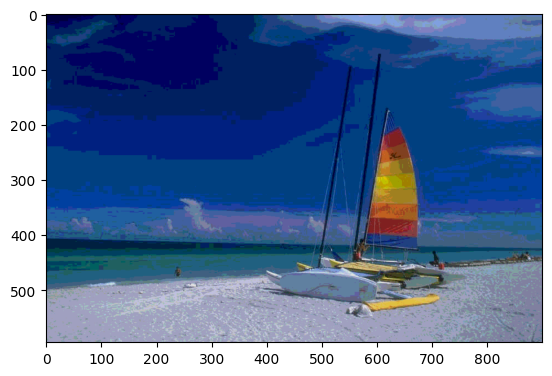

In [87]:
plt.imshow(sub_quantize(img, 3))